In [1]:
import matplotlib.pyplot as plt
import sys
import os


In [2]:
# Add the parent directory to the path to import src as a package
sys.path.insert(0, os.path.abspath('..'))
from src import dataloader

In [3]:
plot_flag = False

# Example of loading only the EEG data

In [4]:

# creates a DataLoader class object that creates a structure described in the docs folder (data_structure_spec.md) from raw data
dyad_id = "W020" #"W003"
lowcut=3.0
highcut=40.0
multimodal_data = dataloader.create_multimodal_data(data_base_path = "../data", dyad_id = dyad_id, load_eeg=True, load_et=False, plot_flag=plot_flag, lowcut=lowcut, highcut=highcut)

Detected events: [{'name': 'Brave', 'start': 197.640625, 'duration': 59.298828125}, {'name': 'Peppa', 'start': 267.189453125, 'duration': 59.5986328125}, {'name': 'Incredibles', 'start': 337.01953125, 'duration': 59.21484375}, {'name': 'Talk_1', 'start': 533.42578125, 'duration': 181.056640625}, {'name': 'Talk_2', 'start': 773.2294921875, 'duration': 181.056640625}]
Applying fir filters to EEG data.
Reseting the EEG time to the start of Brave
No ET_event found, using EEG_events data only.
Events column created based on EEG_events and ET_event columns.
Event structure created based on events column.

Event Name                     Start (s)       Duration (s)   
Brave                          0.00            59.30          
Peppa                          69.55           59.60          
Incredibles                    139.38          59.21          
Talk_1                         335.79          181.06         
Talk_2                         575.59          181.06         



In [5]:
multimodal_data.data.columns

Index(['time', 'time_idx', 'ECG_ch', 'ECG_cg', 'IBI_ch', 'IBI_cg',
       'EEG_ch_Fp1', 'EEG_ch_Fp2', 'EEG_ch_F7', 'EEG_ch_F3', 'EEG_ch_Fz',
       'EEG_ch_F4', 'EEG_ch_F8', 'EEG_ch_M1', 'EEG_ch_T3', 'EEG_ch_C3',
       'EEG_ch_Cz', 'EEG_ch_C4', 'EEG_ch_T4', 'EEG_ch_M2', 'EEG_ch_T5',
       'EEG_ch_P3', 'EEG_ch_Pz', 'EEG_ch_P4', 'EEG_ch_T6', 'EEG_ch_O1',
       'EEG_ch_O2', 'EEG_cg_Fp1', 'EEG_cg_Fp2', 'EEG_cg_F7', 'EEG_cg_F3',
       'EEG_cg_Fz', 'EEG_cg_F4', 'EEG_cg_F8', 'EEG_cg_M1', 'EEG_cg_T3',
       'EEG_cg_C3', 'EEG_cg_Cz', 'EEG_cg_C4', 'EEG_cg_T4', 'EEG_cg_M2',
       'EEG_cg_T5', 'EEG_cg_P3', 'EEG_cg_Pz', 'EEG_cg_P4', 'EEG_cg_T6',
       'EEG_cg_O1', 'EEG_cg_O2', 'EEG_events', 'diode', 'events'],
      dtype='str')

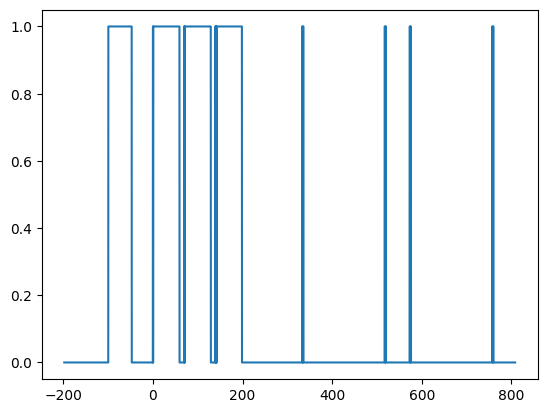

In [6]:
%matplotlib inline
plt.plot(multimodal_data.data['time'],multimodal_data.data['diode'])
plt.show()

## Example of direct access to columns in a multimodal_data object

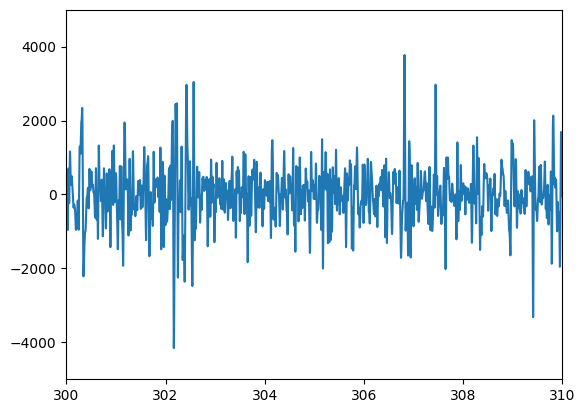

In [7]:
plt.plot(multimodal_data.data['time'],multimodal_data.data['EEG_cg_Fp1'])
plt.xlim(300, 310)
plt.ylim(-5000, 5000)
plt.show()

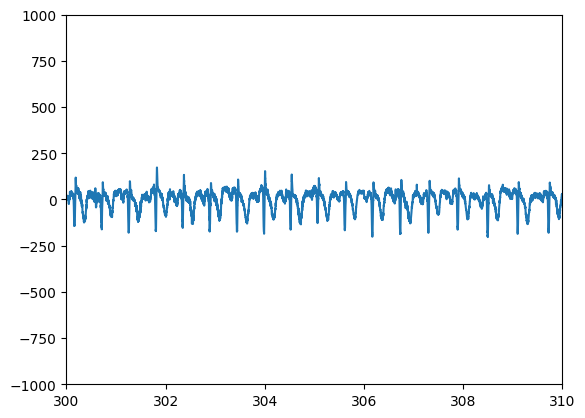

In [8]:
plt.plot(multimodal_data.data['time'],multimodal_data.data['ECG_cg'])
plt.xlim(300, 310)
plt.ylim(-1000, 1000)
plt.show()

# Example of loading just the ET data

In [9]:
multimodal_data = dataloader.create_multimodal_data(data_base_path = "../data", dyad_id = dyad_id, load_eeg=False, load_et=True, plot_flag=plot_flag, lowcut=lowcut, highcut=highcut)

Setting default EEG sampling frequency to 1024 Hz used also in ET data.
ET time range: 273.25s to 493.04s
Events from ET annotations:
[None 'Brave' 'Peppa' 'Incredibles']
Reseting the ET time to the start of Brave
No EEG_events found, using ET_event data only.
Events column created based on EEG_events and ET_event columns.
Event structure created based on events column.

Event Name                     Start (s)       Duration (s)   
Brave                          0.00            59.55          
Peppa                          69.57           59.84          
Incredibles                    139.41          59.42          



In [10]:
multimodal_data.data.columns

Index(['time', 'time_idx', 'ET_event', 'ET_ch_x', 'ET_ch_y', 'ET_ch_pupil',
       'ET_ch_blinks', 'ET_cg_x', 'ET_cg_y', 'ET_cg_pupil', 'ET_cg_blinks',
       'events'],
      dtype='str')

Event mapping: {None: 0, 'Brave': 1, 'Peppa': 2, 'Incredibles': 3}


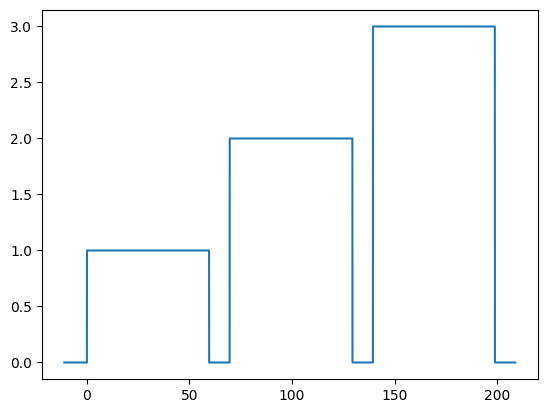

In [11]:
# Create a mapping from unique ET_event values to integers
event_mapping = {event: idx for idx, event in enumerate(multimodal_data.data['ET_event'].unique())}
print("Event mapping:", event_mapping)

# Map ET_event to integer values
multimodal_data.data['event_num'] = multimodal_data.data['ET_event'].map(event_mapping)

plt.plot(multimodal_data.data['time'],multimodal_data.data['event_num'])
plt.show()

# Example of loading both EEG and ET data

In [12]:
multimodal_data = dataloader.create_multimodal_data(data_base_path = "../data", dyad_id = dyad_id, load_eeg=True, load_et=True, plot_flag=plot_flag, lowcut=lowcut, highcut=highcut)

Detected events: [{'name': 'Brave', 'start': 197.640625, 'duration': 59.298828125}, {'name': 'Peppa', 'start': 267.189453125, 'duration': 59.5986328125}, {'name': 'Incredibles', 'start': 337.01953125, 'duration': 59.21484375}, {'name': 'Talk_1', 'start': 533.42578125, 'duration': 181.056640625}, {'name': 'Talk_2', 'start': 773.2294921875, 'duration': 181.056640625}]
Applying fir filters to EEG data.
Reseting the EEG time to the start of Brave
ET time range: 273.25s to 493.04s
Events from ET annotations:
[None 'Brave' 'Peppa' 'Incredibles']
Reseting the ET time to the start of Brave
Event Brave start times are consistent within 0.0 seconds.
Event Peppa differ in start times by: abs(0.0185546875) seconds.
Event Incredibles differ in start times by: abs(0.0322265625) seconds.
Events column created based on EEG_events and ET_event columns.
Event structure created based on events column.

Event Name                     Start (s)       Duration (s)   
Brave                          0.00     

In [13]:
multimodal_data.data.columns

Index(['time_idx', 'ECG_ch', 'ECG_cg', 'IBI_ch', 'IBI_cg', 'EEG_ch_Fp1',
       'EEG_ch_Fp2', 'EEG_ch_F7', 'EEG_ch_F3', 'EEG_ch_Fz', 'EEG_ch_F4',
       'EEG_ch_F8', 'EEG_ch_M1', 'EEG_ch_T3', 'EEG_ch_C3', 'EEG_ch_Cz',
       'EEG_ch_C4', 'EEG_ch_T4', 'EEG_ch_M2', 'EEG_ch_T5', 'EEG_ch_P3',
       'EEG_ch_Pz', 'EEG_ch_P4', 'EEG_ch_T6', 'EEG_ch_O1', 'EEG_ch_O2',
       'EEG_cg_Fp1', 'EEG_cg_Fp2', 'EEG_cg_F7', 'EEG_cg_F3', 'EEG_cg_Fz',
       'EEG_cg_F4', 'EEG_cg_F8', 'EEG_cg_M1', 'EEG_cg_T3', 'EEG_cg_C3',
       'EEG_cg_Cz', 'EEG_cg_C4', 'EEG_cg_T4', 'EEG_cg_M2', 'EEG_cg_T5',
       'EEG_cg_P3', 'EEG_cg_Pz', 'EEG_cg_P4', 'EEG_cg_T6', 'EEG_cg_O1',
       'EEG_cg_O2', 'EEG_events', 'diode', 'ET_event', 'ET_ch_x', 'ET_ch_y',
       'ET_ch_pupil', 'ET_ch_blinks', 'ET_cg_x', 'ET_cg_y', 'ET_cg_pupil',
       'ET_cg_blinks', 'time', 'events'],
      dtype='str')

## Test of events synchronization between the EEG and ET

Event mapping: {None: 0, 'Brave': 1, 'Peppa': 2, 'Incredibles': 3}
Event mapping for events: {None: 0, 'Brave': 1, 'Peppa': 2, 'Incredibles': 3, 'Talk_1': 4, 'Talk_2': 5}


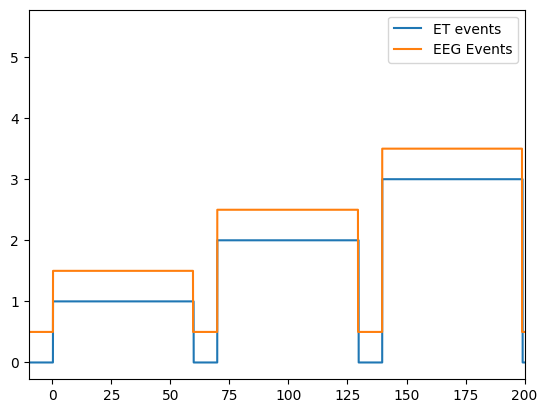

In [14]:

# Create a mapping from unique ET_event values to integers
event_mapping = {event: idx for idx, event in enumerate(multimodal_data.data['ET_event'].unique())}
print("Event mapping:", event_mapping)

# Map ET_event to integer values
multimodal_data.data['event_num_ET'] = multimodal_data.data['ET_event'].map(event_mapping)

# create a mapping from unique events values to integers
event_mapping_events = {event: idx for idx, event in enumerate(multimodal_data.data['events'].unique())}
print("Event mapping for events:", event_mapping_events)

multimodal_data.data['event_num_events'] = multimodal_data.data['events'].map(event_mapping_events)


plt.plot(multimodal_data.data['time_idx']/multimodal_data.fs, multimodal_data.data['event_num_ET'], label='ET events')
plt.plot(multimodal_data.data['time_idx']/multimodal_data.fs    ,multimodal_data.data['event_num_events']+0.5, label='EEG Events')
plt.legend()
plt.xlim(-10,200)
plt.show()

## Example of direct access to the various modalities in the multimodal_data object

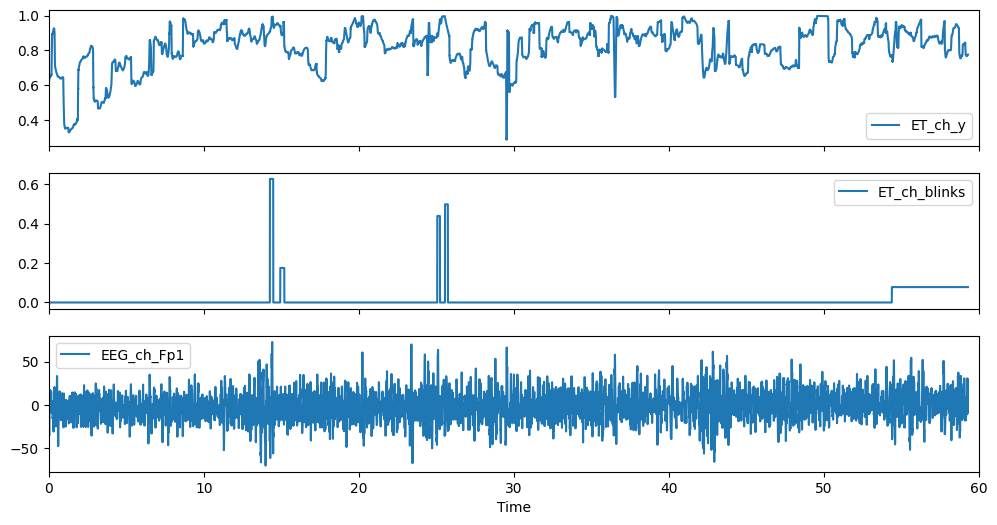

In [15]:
%matplotlib inline
data_selected = multimodal_data.data[(multimodal_data.data.events == 'Brave')]
fig, ax = plt.subplots(figsize=(12, 6),sharex=True, sharey=False,nrows=3)
#ax[0].plot(data_selected['time'], data_selected['ET_cg_y'], linestyle='-', label='ET_cg_y')
ax[0].plot(data_selected['time'], data_selected['ET_ch_y'], linestyle='-', label='ET_ch_y')
ax[0].legend()

#ax[1].plot(data_selected['time'], data_selected['ET_cg_blinks'], linestyle='-', label='ET_cg_blinks')
ax[1].plot(data_selected['time'], data_selected['ET_ch_blinks'], linestyle='-', label='ET_ch_blinks')
ax[1].legend()

#ax[2].plot(data_selected['time'], data_selected['EEG_cg_Fp1'], linestyle='-', label='EEG_cg_Fp1')
ax[2].plot(data_selected['time'], data_selected['EEG_ch_Fp1'], linestyle='-', label='EEG_ch_Fp1')
ax[2].legend()

plt.xlim(0,60)
plt.xlabel('Time')
plt.show()

## Example of access to the same modalities as above using get_signal method

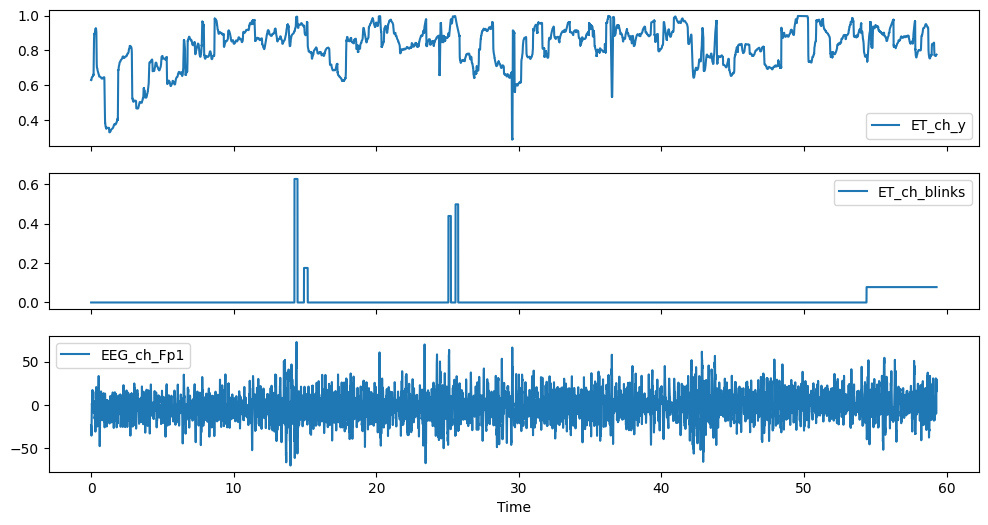

In [16]:
time, _, ET_ch_y = multimodal_data.get_signals(mode='ET', member='ch', selected_channels=['y'], selected_events=['Brave'])
_, _, ET_ch_blinks = multimodal_data.get_signals(mode='ET', member='ch', selected_channels=['blinks'], selected_events=['Brave'])
_, _, EEG_ch_Fp1 = multimodal_data.get_signals(mode='EEG', member='ch', selected_channels=['Fp1'], selected_events=['Brave'])

fig, ax = plt.subplots(figsize=(12, 6),sharex=True, sharey=False,nrows=3)
ax[0].plot(time, ET_ch_y, linestyle='-', label='ET_ch_y')
ax[0].legend()  
ax[1].plot(time, ET_ch_blinks, linestyle='-', label='ET_ch_blinks')
ax[1].legend()
ax[2].plot(time, EEG_ch_Fp1, linestyle='-', label='EEG_ch_Fp1')
ax[2].legend()
plt.xlabel('Time')
plt.show()
